## Caso Viscosímetro de Cono (Caso Fluido Newtoniano)

_G. Raush_

_Marzo 2021_

_**Departamento de Mecànica de Fluids-UPC**_

![enunciado](img/Prob_1p53Fig.png)

#### Hipótesis

- $h<<r_0$
- $\mu$ constante
- $\omega(t=0) = \omega_0$
- fluido newtoniano $\Rightarrow \mu$ constante

Comandos Importación de paquetes   necesarios para  el tratamiento simbólico

In [196]:
import sympy as sp
import matplotlib.pyplot as plt
from sympy.printing import latex
%matplotlib inline
sp.init_printing()

In [207]:
from IPython.display import display, Markdown, Math, Latex
def printmd(string):
    display(Markdown(string))
def printmd2(expression):
    display(Markdown(r'$$'+sp.latex(expression)+'$$'))

Definición de las variables del problema

In [8]:
r0,theta,h,pi,mu,g = sp.symbols('r0,theta,h,pi,mu,g',positive=True)
V = sp.Function('V')
y = sp.Symbol('y')
#dh, tau = sp.symbols('dh,tau1')
#dV_dy = sp.symbols('dV/dy')

Ley de Newton de la viscosidad

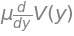

In [9]:
tau = mu*V(y).diff(y)
#sp.pprint(tau1)
display(tau)

Si el espesor es pequeño $h<<r_0$, para el caso de fluidos newtonianos,  la velocidad adopta un poerfil lineal que significa que el  perfil de velocidad es  lineal. Por lo tanto, el  gradiente de la velocidad es una constante. Como ejemplo podemos suponer una constante $a$ y la velocidad sigue la ley $V(y) = a y$ con lo que su gradiente será 

In [27]:
from IPython.display import display, Markdown
a = sp.Symbol('a')
V = a*y
display(Markdown(r'$\frac{\text{d}}{\text{dy}}\text{V(y)} = a$'))#.format(2.3)))

$\frac{\text{d}}{\text{dy}}\text{V(y)} = a$

El valor de la constante de gradiente es igual al ratio entre $$a = \frac{\omega(t) r}{h}$$

In [149]:
t = sp.Symbol('t')
r = sp.Symbol('r')
omega = sp.Function('omega')

In [153]:
a = sp.Symbol('a')
V = a*y
tau = mu*V.diff(y)
tau
printmd('$$\\tau ='+sp.latex(tau)+'$$')

$$\tau =a \mu$$

In [156]:
tau = tau.subs(a,omega(t)*r/h)
tau

El diferencial de fuerza aplicada al cono por la fricción del fluid es $$dF=\tau dA$$ siendo $$dA = 2\pi r \frac{dr}{\sin\theta}$$

In [158]:
dF = tau*2*sp.pi*r/sp.sin(theta)
printmd(r'$$dF = ' + sp.latex(dF)+'dr$$')


$$dF = \frac{2 \pi \mu r^{2} \omega{\left(t \right)}}{h \sin{\left(\theta \right)}}dr$$

Y el momento ejercido sobre el diferencia de área del cono, $dA$ es $$dM = dF r$$

In [160]:
dM = dF * r
printmd('$$dM = '+sp.latex(dM)+'dr$$')

$$dM = \frac{2 \pi \mu r^{3} \omega{\left(t \right)}}{h \sin{\left(\theta \right)}}dr$$

Integrando en $r=[0,R]$ conocemos el momento $M(t)$ 

In [161]:
#sp.integrate?

In [162]:
R=sp.Symbol('R')
M=dM.integrate((r,0,R))
printmd('$$M(t) = '+sp.latex(M)+'$$')

$$M(t) = \frac{\pi R^{4} \mu \omega{\left(t \right)}}{2 h \sin{\left(\theta \right)}}$$

En el instante que desaparece el momento $M$, y luego de haber conseguido una velocidad $\omega(t)=\omega_0$ de régimen permanente, podemos conocer la evolución de $\omega(t)$

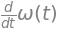

In [165]:
sp.diff(omega(t),t)

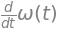

In [166]:
omega(t).diff(t)

$I$ es el momento de inercia del cono

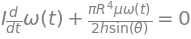

In [177]:
I = sp.Symbol('I')
sp.Eq(M+I*omega(t).diff(t),0)

In [178]:
w0=sp.Symbol('w0')
sol=sp.dsolve(sp.Eq(M+I*omega(t).diff(t),0),omega(t),ics={omega(0):w0})  

In [179]:
sol

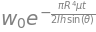

In [183]:
sol.rhs.simplify()

In [180]:
printmd('$$'+sp.latex(sol.simplify())+'$$')

$$\omega{\left(t \right)} = w_{0} e^{- \frac{\pi R^{4} \mu t}{2 I h \sin{\left(\theta \right)}}}$$

Vemos que la respuesta corresponde a un sistema lineal de primer orden amortiguado con una constante de tiempo igual a $$T=\frac{2 I h \sin \theta}{\pi\mu R^4}$$

Sustituyendo la expresión del momento de inercia de un cono rotando sobre su eje generatriz $$I=\frac{3}{10} m R^2$$ siendo $m$ la masa del mismo

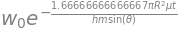

In [189]:
m = sp.Symbol('m')
sol.rhs.simplify().subs(I,3/10*m*R**2)

In [208]:
T=2*I*h*sp.sin(theta)/(sp.pi*mu*R**4)
T2=T.subs(I,3/10*m*R**2)
printmd2(T2)

$$\frac{0.6 h m \sin{\left(\theta \right)}}{\pi R^{2} \mu}$$

La constante de tiempo igual a $$T=\frac{0.6 h m \sin \theta}{\pi\mu R^2}$$

### Propuesta de problema amplicación

Calcular la expresión de medida de la viscosidad $\mu$ como función de $M,\omega,\theta$ para el caso de un elemento rotante troncocónico con dimensiones  $R_1$ y $R_2$ tal que $(R_1 < R_2)$. Disposición constructiva que evita el problema tecnológico de la fabricación de un cono en punta aguda.  


<font size="5"><span  style="color:red"> **Se puede borrar:**</span> Old Problem</font>

~~Por definición , el esfuerzo $\tau_1$ en una fuerza repartida en un área. Por lo tanto, para calcular la fuerza ejercida necesitamos conocer el área de aplicación.

dA,dz = sp.symbols('dA,dz')
dA = pi*D*dz
dA

~~El diferencial de área , $dA = \pi D dz$

~~El diferencial de momentos es el producto del diferencial de fuerza por el brazo de palanca

dM = sp.symbols('dM1')
dM = (tau1*dA)*D/2
dM

#sp.pprint(dM)

~~El diferencial de momento es función lineal con el número de revoluciones, por tratarse de un fluido newtoniano, (tiene un  perfil de velocidad lineal en su gradiente)

$$dM = \frac{D^{3}  \mu_{1} \omega \pi}{4 h}dz$$

~~Integramos en el dominio de la variable, $0 \le z \le H$. Este es el momento total aplicado en la pared del cilindro.

M1 = sp.integrate(dM/dz,H)
#sp.pprint(M1)
M1

#latex(M1)

$$M_1 = \frac{D^{3} H \mu_{1} \omega \pi}{4 h}$$ 

~~Ecuación de momentos mecánicos en la pared de la base del cilindro rotante. Hay dos momentos diferentes debido a la existencia de dos fluidos. En ambos casos se calculan igual, solo que cambian las propiedades de los fluidos y los límites de integración.


~~r,dr = sp.symbols('r,dr')

~~Caso para el fluido 1, viscosidad: $\mu_1$. La región de existencia es entre $d/2 \le r \le D/2$  

dM = ((omega*r/e)*mu1)*(2*pi*r)*r*dr
M2 = sp.integrate(dM/dr,(r,d/2,D/2))
#sp.pprint(M2)
M2

M2 = M2.simplify()
#sp.pprint(M2)
M2

#latex(M2)

$$M_2 = \frac{\mu_{1} \omega \pi \left(D^{4} - d^{4}\right)}{32 e}$$

~~Cálculo similar para el caso del Fluido 2, viscosidad : $\mu_2$, en el caso del ejemplo _Agua_

~~Ahora el dominio de la variable de integración es $0 \le r \le d/2$

dM = ((omega*r/e)*mu2)*(2*pi*r)*r*dr
M3 = sp.integrate(dM/dr,(r,0,d/2))
M3 #sp.pprint(M3)

#latex(M3)

$$M_3 = \frac{d^{4} \mu_{2} \omega \pi}{32 e}$$

~~El momento total sobre el rotor es la sumatoria de ellos. $$M_t = \sum M_i$$


M = M1+M2+M3
M #sp.pprint(M)
#sp.print_latex(M)

#latex(M)

~~Solución del momento total:

~~$$M = \frac{D^{3} H \mu_{1} \omega \pi}{4 h} + \frac{d^{4} \mu_{2} \omega \pi}{32 e} + \frac{\mu_{1} \omega \pi \left(D^{4} - d^{4}\right)}{32 e}$$

~~Como vemos en la expresión anterior, la presencia de un fluido extraño, por ejemplo: agua en aceite, el término de $\mu_2$ desaparecería.  

~~M.subs(mu2,0).simplify()

~~De donde se puede despejar $\mu_1$ y obtener la constante de calibración del viscosímetro.

~~La potencia consumida por el viscosímetros es,

~~Pw = omega * M.subs(mu2,0)
~~Pw.expand().simplify()

~~Pw = sp.Symbol('Pot')
eq = sp.Eq(Pw - omega * M.subs(mu2,0))
#eq
#sp.solve(eq,mu1)

~~Con la medida de la potencia $P_{tot}$ y una velocidad $\omega$ se puede conocer el valor de la viscosidad $\mu_1$ y los demás términos constantes se pueden conocer haciendo una calibración del viscosímetro usando un fluido de referencia como el agua.

~~sp.solve(eq,mu1)[0].simplify()

